# ECMM422  Machine Learning
## Course Assessment 2


This course assessment (CA2) represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. do not change the name of this notebook, i.e. the notebook file has to be named: ca1.ipynb
2. do not remove/delete any cell
3. do not add any cell (you can work on a draft notebook and only copy the function implementations here)
4. do not add you name or student code in the notebook or in the file name

**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

Each question is awarded a number of marks. 

A (hidden) unit test is going to evaluate if all desired properties of the required function(s) are met. 

If the test passes all the associated marks are awarded, if it fails 0 marks are awarded. The large number of questions and sub-questions allows a fine grading. 


**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Notes:

We call *rank* the number of indices required to get individual elements of an array. A matrix requires two indices (row, column), and has thus rank 2, a vector requires one index and has rank 1, a scalar does not require any index and has rank 0. The components that make up rank are called *axes* (plural of axis). The dimension is how many elements are in a particular axis. A *shape* is a tuple whose length is the rank and elements are the dimension of each axis.

In the rest of the notebook, the term `data matrix` refers to a rank two numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

In the rest of the notebook, the term `vector` refers to a rank one numpy array. When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write need to take in input and return as output such objects (i.e. not python lists).

---

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.

---

You are asked to solve the quadratic optimization problem using the library [cvxopt](http://cvxopt.org/).  

You can install the library via:

`pip install cvxopt`

or

`conda install -c conda-forge cvxopt`

Then you should be able to import the module with:

    `import cvxopt`
  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import cvxopt

## Question 1  [marks 3]


a) Make the following functions: 

- `TPR = true_positive_rate(preds, targets)` 
- `FPR = false_positive_rate(preds, targets)` 

to compute the sequence of true (resp. false) positive rates for all possible threshold values.
The functions should work equally well when the input is of the type `list` or `numpy array`. 
The input `preds` contains the predictions as float numbers and the input `targets` contains the true class labels encoded as the integers `1` or `-1`. 

b) Make the function `compute_auc(TPR, FPR)` to compute the area under the curve of the ROC given in input the list of true poritive rates and false positive rates for all possible threshold values.

In [2]:
def true_positive_rate(preds, targets):
    # Convert inputs to numpy arrays if they are not already
    preds = np.asarray(preds)
    targets = np.asarray(targets)
    
    # Sort the predictions in descending order
    sorted_idx = np.argsort(preds)[::-1]
    targets_sorted = targets[sorted_idx]
    
    # Calculate the cumulative sum of true positive labels
    cum_tp = np.cumsum(targets_sorted == 1)
    
    # Calculate the total number of positive labels
    total_pos = np.sum(targets == 1)
    
    # Calculate the true positive rate for all possible threshold values
    tpr = cum_tp / total_pos
    
    return tpr

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [4]:
def false_positive_rate(preds, targets):
    # Convert inputs to numpy arrays if they are not already
    preds = np.asarray(preds)
    targets = np.asarray(targets)
    
    # Sort the predictions in descending order
    sorted_idx = np.argsort(preds)[::-1]
    targets_sorted = targets[sorted_idx]
    
    # Calculate the cumulative sum of false positive labels
    cum_fp = np.cumsum(targets_sorted == -1)
    
    # Calculate the total number of negative labels
    total_neg = np.sum(targets == -1)
    
    # Calculate the false positive rate for all possible threshold values
    fpr = cum_fp / total_neg
    
    return fpr

In [5]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [6]:
def compute_auc(TPR, FPR):
    # Compute AUC using trapezoidal rule
    auc = 0
    print(len(TPR), len(FPR))
    for i in range(1, len(TPR)):
        auc += (FPR[i] - FPR[i-1]) * (TPR[i] + TPR[i-1]) / 2
        
    return auc

In [7]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2  [marks 3]


a) Make a function `classifier = train_rf(X_train, y_train, param)` that takes in input a data matrix `X_train`, an associated target array `y_train`, and a single scalar parameter `param` which corresponds to the maximum depth of the decision trees used in the forest, and returns a fit classifier object of type `sklearn.ensemble.RandomForestClassifier`. In this implementation you must fix the number of decision trees used in the forest to the value 10.

b) Make a function `preds = test_rf(X_test, classifier)` that takes in input a data matrix `X_test`, a classifier object `classifier` and returns the prediction array `preds`.

c) Make a function `scores = score_rf(X_test, classifier)` that takes in input a data matrix `X_test`, a classifier object `classifier` and returns the array `scores` containing the probability for each instance to belong to the positive class (which is assumed to be encoded with the integer `1`).

In [8]:
from sklearn.ensemble import RandomForestClassifier

def train_rf(X_train, y_train, param):
    clf = RandomForestClassifier(n_estimators=10, max_depth=param)
    clf.fit(X_train, y_train)
    
    return clf

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [10]:
def test_rf(X_test, estimator):
    preds = estimator.predict(X_test)
    
    return preds

In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [12]:
def score_rf(X_test, estimator):
    scores = estimator.predict_proba(X_test)[:, 1]
    
    return scores

In [13]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3  [marks 2]

Make a function `scores_list = compute_scores(train_func, score_func, param, X_train, y_train, X_test, num)` that trains a classifier on `X_train, y_train` and tests it on `X_test` a number of times equal to `num`. The function outputs a list of score arrays of size `num`, and each score array contains the predicted probability for each instance in `X_test` to belong to the positive class (which is assumed to be encoded with the integer `1`). Note that by using a randomized classifier (like the random forest) you will get different output score arrays each time. 

In [75]:
def compute_scores(train_func, score_func, param, X_train, y_train, X_test, num):
    scores_list = []
    
    y_train[y_train == 0] = -1
    
    for i in range(num):
        # Train a classifier using the input function and param
        clf = train_func(X_train, y_train, param)
        
        # Compute probability of each instance in X_test to belong to the positive class using the input scoring function
        scores = score_func(X_test, clf)
        
        # Append computed scores to scores_list
        scores_list.append(scores)
        
    return scores_list

In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4  [marks 7]

Make a function `tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(scores_list, y_test, false_positive_rate_func, true_positive_rate_func, low_quantile, high_quantile)`. The function takes in input a list of predicted scores, the true classes, a function to compute the false positive rate and one to compute the true positive rate and two threshold values: low_quantile and high_quantile. The function will output 4 lists (or arrays): 

- tpr_low: the true positive rate corresponding to the `low_quantile` true positive rate 
- tpr_high: the true positive rate corresponding to the `high_quantile` true positive rate
- tpr_mid: the true positive rate corresponding to the median true positive rate
- fpr: the false positive rate

Note: instead of a single pair `(true positive rate,false positive rate)` the `scores_list` allows you to have mutiple true positive rate values for the same false positive rate value, i.e. a distribution of true positive rate values; the function `compute_tpr_fpr_range` must output the values corresponding to the quantiles of such distributions (e.g. the true positive rate corresponding to the 95 percentile of the true positive rate distribution) for each corresponding false positive rate value (see the figure the Checkpoint cell below).


In [76]:
def compute_tpr_fpr_range(scores_list, y_test, false_positive_rate_func, true_positive_rate_func, low_quantile, high_quantile):
    # Compute the true positive rates and false positive rates for each iteration
    y_test[y_test == 0] = -1
    
    tpr_list = []
    fpr_list = []
    for scores in scores_list:
        fpr = false_positive_rate_func(scores, y_test)
        tpr = true_positive_rate(scores, y_test)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # Compute the median true positive rate and corresponding false positive rate
    median_tpr = np.median(tpr_list, axis=0)
    median_fpr = np.median(fpr_list, axis=0)
    
    # Compute the true positive rates corresponding to the low and high quantiles and their corresponding false positive rates
    low_index = int(len(tpr_list) * low_quantile)
    high_index = int(len(tpr_list) * high_quantile)
    tpr_low = np.sort(tpr_list, axis=0)[low_index]
    tpr_high = np.sort(tpr_list, axis=0)[high_index]
    fpr = np.sort(fpr_list, axis=0)[low_index]
    
    return tpr_low, tpr_high, median_tpr, fpr

In [17]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 5  [marks 3]

Make a function `plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc_func)` that takes in input the true positive rate corresponding to the `low_quantile` true positive rate, the true positive rate corresponding to the `high_quantile` true positive rate, the true positive rate corresponding to the median true positive rate, the false positive rate and a function to compute the ROC AUC and produces a plot like:

<img src='plot1.png' width=300>

In [19]:
def plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc_func):
    # Compute ROC AUC
    auc = compute_auc_func(tpr_mid, fpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr_mid, color='b', label='ROC curve (AUC = %0.2f)' % auc)
    plt.fill_between(fpr, tpr_low, tpr_high, color='grey', alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [20]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=500, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.1, class_sep=1.0, random_state=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=50, random_state=2)

scores_list = compute_scores(train_rf, score_rf, 5, X_train, y_train, X_test, num=100)
tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(scores_list, y_test, false_positive_rate, true_positive_rate, low_quantile=0.05, high_quantile=0.95)
plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc)
```

You should obtain something like:

<img src='plot1.png' width=300>

50 50


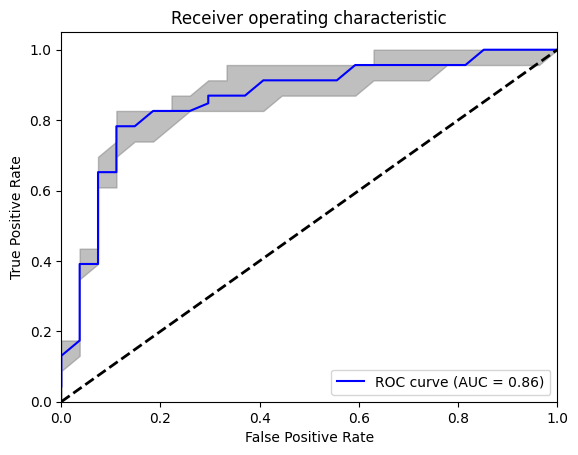

In [77]:
# Just run the following code, do not modify it

from sklearn.datasets import make_classification
X,y = make_classification(n_samples=500, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.1, class_sep=1.0, random_state=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=50, random_state=2)

scores_list = compute_scores(train_rf, score_rf, 5, X_train, y_train, X_test, num=100)
tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(scores_list, y_test, false_positive_rate, true_positive_rate, low_quantile=0.05, high_quantile=0.95)
plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc)

## Question 6  [marks 6]

Solve a constrained quadratic program (QP) with `cvxopt`. 

The standard form for a QP in `cvxopt` notation is:

\begin{align*}
        \min_{x}  \tfrac{1}{2} x^T P x &+ q^T x \\
        \text{such that   }\quad  Gx &\preceq h\\
        Ax & = b
\end{align*}
where $Gx \preceq h$ means that the inequality is taken element-wise for each row of $Gx$ and $h$.

In `cvxopt` the QP is defined by the parameters $P, q, G, h, A$ and $b$.  The matrix $P$ and the vector $q$ must be specified, but the others are optional.   Note that all optimisations must be manipulated to be of this form.

Consider this problem:

\begin{align*}
        \min_{x}  \tfrac{1}{8} x^2 - \frac{1}{10} y ^ 2+ & \frac{1}{4} x + y\\
        \text{such that   }\quad y - x & \le 0\\
        x + 3y & \ge 15\\
        3x + 5y & \ge 40\\
        \frac{1}{2} x + 4y & \le 50
\end{align*}

Consider a grid covering the range $[0, 15] \times [-2, 15]$ (i.e. $x \in [0, 15]$ and $y \in [-2, 15]$).

Make a function `P,q,G,h = make_matrices()` that returns the corresponding matrices of type `cvxopt.matrix` for this specific problem.

In [22]:
from cvxopt import matrix

def make_matrices():
    P = matrix([[0.25, 0.0], [0.0, -0.2]])
    q = matrix([0.25, 1.0])
    G = matrix([[-1.0, -1.0, -3.0, 0.5], [1.0, -3.0, -5.0, 4.0]])
    h = matrix([0.0, -15.0, -40.0, 50.0])

    return P, q, G, h

In [23]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 7  [marks 4]

Make a function `sol, obj = compute_solution_and_objective(P,q,G,h)` that takes in input the corresponding matrices of type `cvxopt.matrix` and returns `sol` containing the vector (as a numpy array) that minimizes the constrained QP problem and a scalar `obj` that contains the value of the objective function evaluated at the solution (i.e. the minimum of the objective function).

In [24]:
from cvxopt import solvers

def compute_solution_and_objective(P,q,G,h):
    # solve QP problem
    sol = cvxopt.solvers.qp(P, q, G, h)
    
    # extract solution and objective value
    x = np.array(sol['x']).flatten()
    obj = sol['primal objective']
    
    return x, obj

In [25]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 8  [marks 6]

Make a function `plot_solution(sol)` that takes in input the solution array `sol` to the previous QP problem and displays:

- the feasibility region by representing the constraints 
- the objective function via colored contour lines and an associated color scale 
- the solution as a red dot

The result (applied to a different QP problem) should resemble in style the following plot:

<img src='plot2b.png' width=300>

In [26]:
def plot_solution(sol):
    # set up grid
    x = np.linspace(0, 15, 100)
    y = np.linspace(-2, 15, 100)
    X, Y = np.meshgrid(x, y)
    
    # evaluate objective function on grid
    Z = 1/8*X**2 - 1/10*Y**2 + 1/4*X + Y
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title(r'$f_0(x, y)$')
    plt.axhline(0.0)
    plt.axvline(0.0)
    plt.contour(X, Y, Z, 50)
    plt.plot(x, 5 - x / 3, 'r')
    plt.plot(x, (100 - 2 * x) / 5, 'b')
    plt.plot(x, (80 - 3 * x) / 4, 'g')
    s = np.array(sol).T
    plt.scatter(s[0],s[1],s=200,c='r')
    plt.colorbar()
    plt.axis('scaled')
    plt.show()

In [27]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```python
P,q,G,h = make_matrices()
sol, obj = compute_solution_and_objective(P,q,G,h)
plot_solution(sol)
print(sol, obj)
```

If you had to solve the following **different** problem:
\begin{align*}
        \min_{x}  \tfrac{1}{2} x^2 + & 3x + 4y\\
        \text{such that   }\quad x, y & \ge 0\\
        x + 3y & \ge 15\\
        2x + 5y & \le 100\\
        3x + 4y & \le 80
\end{align*}
in the domain $[-5, 20] \times [-5, 20]$, then you would obtain a picture like this:

<img src='plot2.png' width=300>

Note however that **your problem is different** and you will obtain a different figure and a different solution.

     pcost       dcost       gap    pres   dres
 0:  5.6911e-01  1.9564e+02  3e+02  4e-01  8e+01
 1:  1.0471e+01 -3.6867e+00  1e+01  7e-03  2e+00
 2:  7.6596e+00  5.5618e+00  2e+00  2e-04  4e-02
 3:  7.0174e+00  6.8112e+00  2e-01  7e-06  2e-03
 4:  6.8764e+00  6.8743e+00  2e-03  7e-08  2e-05
 5:  6.8750e+00  6.8750e+00  2e-05  7e-10  2e-07
 6:  6.8750e+00  6.8750e+00  2e-07  7e-12  2e-09
Optimal solution found.


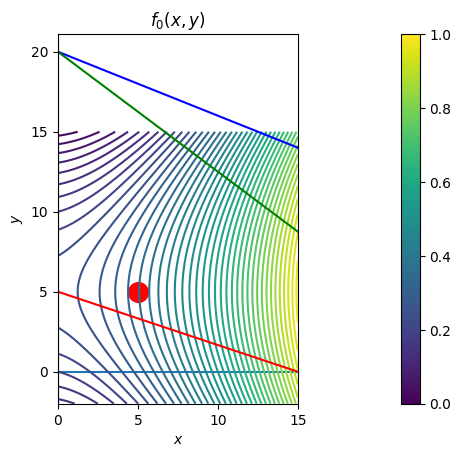

[5.0000001  5.00000004] 6.875000144803481


In [28]:
# Just run the following code, do not modify it

P,q,G,h = make_matrices()
sol, obj = compute_solution_and_objective(P,q,G,h)
plot_solution(sol)
print(sol, obj)

## Kernelized Large Margin Classifiers

In this exercise you are asked to develop the code to solve the optimization problem that defines a kernelized Large Margin Classifier with soft margins. 

### Linear case

We need to match the solver's API which, according to the documentation is of the form:

\begin{aligned}
    & \min \frac{1}{2} x^TPx + q^Tx
    \\
     s.t. \ & \ Gx \leq h 
    \\
    & \ Ax = b
\end{aligned}

Recall that the dual problem is expressed as:

\begin{aligned}
\max_{\alpha} \sum_i^m \alpha_i - \frac{1}{2} \sum_{i,j}^m y^{(i)}y^{(j)} \alpha_i \alpha_j <x^{(i)}, x^{(j)}>
\end{aligned}

Let $\mathbf{H}$ be a matrix such that $H_{i,j} = y^{(i)}y^{(j)} <x^{(i)} x^{(j)}>$, then the optimization becomes:

\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. & \ \alpha_i \geq 0 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}

We convert the sums into vector form and multiply both the objective and the constraint by −1 which turns this into a minimization problem and reverses the inequality

\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
    & s.t. \ - \alpha_i \leq 0 
    \\
    & s.t. \ y^T \alpha = 0 
\end{aligned}

We are now ready to convert our numpy arrays into the cvxopt format, using the same notation as in the documentation this gives

* $P:=H$ a matrix of size $m×m$
* $q:=−\vec{1}$  a vector of size $m×1$
* $G:=−diag[1]$ a diagonal matrix of -1s of size $m×m$
* $h:=\vec{0}$ a vector of zeros of size $m×1$
* $A:=y^T$ the label vector of size $1×m$
* $b:=0$ a scalar

Note that in the simple example of $m=2$ the matrix $G$ and vector $h$ which define the constraint are 

$$G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} \ \ \text{and} \ \ h = \begin{bmatrix} 0 \\ 0  \end{bmatrix}$$

### Computing the matrix $\mathbf{H}$ in vectorized form

Consider the simple example with 2 input samples $\{x^{(1)}, x^{(2)}\} \in \mathbb{R}^2$ which are two dimensional vectors. i.e. $x^{(1)} = (x_1^{(1)} , x_2^{(1)})^T$

$$X = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \end{bmatrix} \ \ \text{and} \ \ y = \begin{bmatrix} y^{(1)}  \\ y^{(2)} \end{bmatrix}$$

We now proceed to creating a new matrix $X′$ where each input sample $x$ is multiplied by the corresponding output label y. This can be done easily in Numpy using vectorization and padding.

$$X' = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix}$$

Finally we take the **matrix multiplication** of $X′$ and its transpose giving $H=X′X′^T$

$$H = X' @ X'^T = \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(1)}_2y^{(1)} \\
x^{(2)}_1y^{(2)} & x^{(2)}_2y^{(2)} \end{bmatrix} \begin{bmatrix} x^{(1)}_1 y^{(1)} & x^{(2)}_1 y^{(2)}  \\
x^{(1)}_2y^{(1)} & x^{(2)}_2y^{(2)} \end{bmatrix}$$

$$H = \begin{bmatrix}  x^{(1)}_1 x^{(1)}_1y^{(1)}y^{(1)} + x^{(1)}_2x^{(1)}_2y^{(1)}y^{(1)} & x^{(1)}_1 x^{(2)}_1y^{(1)}y^{(2)} + x^{(1)}_2x^{(2)}_2y^{(1)}y^{(2)} \\ x^{(2)}_1 x^{(1)}_1y^{(2)}y^{(1)} + x^{(2)}_2x^{(1)}_2y^{(2)}y^{(1)} & x^{(2)}_1 x^{(2)}_1y^{(2)}y^{(2)} + x^{(2)}_2x^{(2)}_2y^{(2)}y^{(2)} \end{bmatrix}$$


### Soft margin
For the softmax margin SVM, recall that the optimization problem can be expressed as

\begin{aligned}
    & \max_{\alpha} \sum_i^m \alpha_i  - \frac{1}{2}  \alpha^T \mathbf{H}  \alpha
    \\
     s.t. \ \ & 0 \leq \alpha_i \leq C 
    \\
    &  \ \sum_i^m \alpha_i y^{(i)} = 0  
\end{aligned}

which can be written in standard form as

\begin{aligned}
    & \min_{\alpha}  \frac{1}{2}  \alpha^T \mathbf{H}  \alpha - 1^T \alpha
    \\
     s.t. & \ - \alpha_i \leq 0 
    \\
     & \alpha_i \leq C
     \\
     &\ y^T \alpha = 0  
\end{aligned}

This is almost the same problem as previously, except for the additional inequality constraint on $\alpha$. We translate this new constraint into standard form by concatenating below matrix $G$ a diagonal matrix of 1s of size $m \times m$. Similarly for the vector $h$ to which the value of $C$ is added $m$ times.

Note that in the simple example of $m=2$ the matrix $G$ and vector $h$ which define the constraint are

$$G = \begin{bmatrix} -1 & 0 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1\end{bmatrix} \ \ \text{and} \ \ h = \begin{bmatrix} 0 \\ 0 \\ C \\ C \end{bmatrix}$$

### Non linear case

What has been written above corresponds to the hard and the soft margin case for a linear large margin classification problem.  

You now need to appy the *kernel trick*, i.e. you need to replace the dot product operations in the input space $<x^{(i)} x^{(j)}>$ with the dot product in the feature space via a kernel function $K(x^{(i)},x^{(j)}) = <\phi(x^{(i)}) \phi(x^{(j)})>$. 

## Question 9  [marks 5]

Make the function `H = make_H_k(X,t, kernel_function, param)` to compute the matrix $H$ for a data matrix `X` and an associated target vector `t` given a kernel function `kernel_function` with parameter `param`. 

In [29]:
def make_H_k(X,t, kernel_function, param):
    n = X.shape[0]  # number of data points
    H = np.zeros((n, n))  # initialize kernel matrix
    
    for i in range(n):
        for j in range(n):
            H[i,j] = kernel_function(X[i], X[j], param)
            
    H = H * np.outer(t, t)  # element-wise multiplication with target vector
    return H

In [30]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 10  [marks 3]

Make the function `P, q, G, h, A, b = setup_optimization_soft_k(X, t, C, kernel_function, param)` to compute the necessary matrices to solve the QP problem associated to the soft margin kernelized classification task using the library [cvxopt](http://cvxopt.org/). The function receives in input a data matrix `X`, an associated target vector `t`, a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

In [31]:
def setup_optimization_soft_k(X,t,C, kernel_function, param):
    n, m = X.shape  # number of data points
    
    # Kernel matrix
    H = make_H_k(X, t, kernel_function, param)
    
    # Define P, q, G, h, A, b matrices
    P = cvxopt.matrix(H)
    q = cvxopt.matrix(-np.ones((n, 1)))
    G = cvxopt.matrix(np.vstack((-np.eye(n), np.eye(n))))
    h = cvxopt.matrix(np.hstack((np.zeros(n), C*np.ones(n))))
    A = cvxopt.matrix(np.array(t.reshape(1, -1), dtype=np.float64))
    b = cvxopt.matrix(np.zeros(1))
    
    return P, q, G, h, A, b

In [32]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 11  [marks 1]

Make the function `support_vectors, support_targets, support_alphas, support_ids = compute_support_vectors(X,t,alphas)`  to compute:
- `support_vectors` the support vectors
- `support_targets` the target vector associated to the support vectors
- `support_alphas` the vector of the dual variables $\alpha_i$ associated to the support vectors
- `support_ids` a boolean vector that indicates if a position is associated to a support vector (w.r.t. the original data matrix) (i.e. if the first instance is a support vector and the second one it is not, then `support_ids` = [True, False])

In [33]:
def compute_support_vectors(X,t,alphas):
    t = t.reshape(-1, 1).astype(float)
    
    support_ids = (alphas > 1e-4).flatten()
    support_vectors = X[support_ids]
    support_targets = t[support_ids]
    support_alphas = alphas[support_ids]
    return support_vectors,support_targets,support_alphas, support_ids

In [34]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 12  [marks 2]

Make the function `model = train_slmkc(X, t, C, kernel_function, param)` to compute the necessary elements to represent a kernelized soft large margin classifier trained over an input data matrix `X` with an associated target vector `t`, for a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

Note: you may implement `model` as a tuple containing information on the support vectors and the dual variables, i.e. `model = (support_vectors,support_targets,support_alphas, support_ids)`.

In [35]:
def train_slmkc(X, t, C, kernel_function, param):
    # Set up optimization problem
    P, q, G, h, A, b = setup_optimization_soft_k(X, t, C, kernel_function, param)
    
    # Solve optimization problem
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    # Extract support vectors and dual variables
    alphas = np.array(solution['x'])
    support_vectors, support_targets, support_alphas, support_ids = compute_support_vectors(X, t, alphas)
    
    # Return support vectors and dual variables as model
    return support_vectors, support_targets, support_alphas, support_ids

In [36]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 13  [marks 7]

Given the kernelized soft large margin discriminant function of the form:
$$ y(x) = \sum_{n \in SV} \alpha_n t_n K(x_n,x) + b $$

and given the encoded `model` to represent the necessary elements for a trained kernelized soft large margin classifier

make the function `b = compute_bias(kernel_function, param, C, model)` to compute the offset/bias term `b`,  for a regularization parameter `C` and a kernel function `kernel_function` with parameter `param`. 

In [37]:
def compute_bias(kernel_function, param, C, model):
    # Extract necessary information from model dictionary
    support_vectors, support_targets, support_alphas, support_ids = model
    sv_count = support_vectors.shape[0]
    b_sum = 0
    for i in range(sv_count):
        b_sum += support_targets[i]
        for j in range(sv_count):
            b_sum -= support_alphas[j] * support_targets[j] * kernel_function(support_vectors[j], support_vectors[i], param)
    b = b_sum / sv_count
    return b

In [38]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [39]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 14  [marks 7]

Make the function `scores = score_slmkc(X_test, kernel_function, param, C, model)` to compute the scores for the kernelized soft large margin discriminant function over the data matrix `X_test`, for a regularization parameter `C`, a kernel function `kernel_function` with parameter `param` and an encoded model `model`.

In [40]:
def score_slmkc(X_test, kernel_function, param, C, model):
    support_vectors, support_targets, support_alphas, support_ids = model
    n_test_samples = X_test.shape[0]
    scores = np.zeros(n_test_samples)

    for i in range(n_test_samples):
        score_i = 0
        for j in range(len(support_alphas)):
            score_i += support_alphas[j] * support_targets[j] * kernel_function(X_test[i], support_vectors[j], param)

        scores[i] = score_i + compute_bias(kernel_function, param, C, model)

    return scores

In [41]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [42]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 15  [marks 2]

Make the function `preds = test_slmkc(X_test, kernel_function, param, C, model)` to predict the class label for the kernelized soft large margin discriminant function over the data matrix `X_test`, for a regularization parameter `C`, a kernel function `kernel_function` with parameter `param` and an encoded model `model`.

In [43]:
def test_slmkc(X_test, kernel_function, param, C, model):
    scores = score_slmkc(X_test, kernel_function, param, C, model)
    preds = np.sign(scores)
    preds[preds == -1] = 0
    return preds

In [44]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [45]:
# this function is provided to you, you do not need to alter it in any way.

class MySoftLargeMarginKernelClassfier(object):
    def __init__(self, C, kernel_function, param):
        self.kernel_function = kernel_function
        self.param = param
        self.C = C
        self.support_vectors = None
        self.support_targets = None
        self.support_alphas = None
        self.support_ids = None
    
    def fit(self, X_train, y_train):
        self.model = train_slmkc(X_train, y_train, self.C, self.kernel_function, self.param)
        self.support_vectors, self.support_targets,self.support_alphas, self.support_ids = self.model
        return self
    
    def predict(self, X_test):
        return test_slmkc(X_test, self.kernel_function, self.param, self.C, self.model)
        
    def decision_function(self, X_test):
        return score_slmkc(X_test, self.kernel_function, self.param, self.C, self.model)
    
    def predict_proba(self, X_test):
        scores = self.decision_function(X_test)
        probs = 1 / (1 + np.exp(-scores))
        return probs

## Question 16  [marks 2]

Make the function `linear_kernel_function(x1,x2,param=None)` corresponding to the linear kernel defined as:
$$ K(x_1,x_2) =  x_1^T x_2 $$
where $x_1$ and $x_2$ are vectors. 

In [46]:
def linear_kernel_function(x1,x2,param=None):
    return np.dot(x1, x2.T)

In [47]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 17  [marks 3]

Make the function `polynomial_kernel_function(x1,x2,param)` corresponding to the polynomial kernel defined by the parameter $r=$`param`:
$$ K(x_1,x_2) =  (1 + x_1^T x_2)^r$$
where $x_1$ and $x_2$ are vectors. 

In [48]:
def polynomial_kernel_function(x1,x2,param):
    r = param
    return (1 + np.dot(x1, x2.T)) ** r

In [49]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [50]:
# this function is provided to you, you do not need to alter it in any way.

def plot(X, y, support_vectors=None, predict_func=None):
    cmap='bwr'
    res = 100
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    delta = max((x_max-x_min)/5, (y_max-y_min)/5)
    x_min -= delta
    y_min -= delta
    x_max += delta
    y_max += delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, res),np.linspace(y_min, y_max, res))
    if predict_func is None:
        Z = np.ones(xx.shape)*.5
    else:
        Z = predict_func(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)]))
        if Z.ndim == 1:
            Z = Z.reshape(xx.shape)
        else:
            Z = Z[:,-1].reshape(xx.shape)
    if support_vectors is None:
        edge_colors = 'w'
        sizes = 50
    else:
        edge_colors = ['k' if s else 'w' for s in support_vectors]
        sizes = [100 if s else 50 for s in support_vectors]
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, levels=20, cmap=cmap, alpha=.5)
    plt.scatter(X[:,0],X[:,1], c=y, s=sizes, edgecolors=edge_colors, cmap=cmap)
    plt.grid()
    plt.axis('equal')
    plt.show()

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):

```python
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.0, class_sep=1.0, random_state=5)
y[y==0]=-1

est = MySoftLargeMarginKernelClassfier(C=1e2, kernel_function=linear_kernel_function, param=None).fit(X, y)
plot(X,y, support_vectors=est.support_ids, predict_func=est.predict_proba)

est = MySoftLargeMarginKernelClassfier(C=1e-2, kernel_function=polynomial_kernel_function, param=5).fit(X, y)
plot(X,y, support_vectors=est.support_ids, predict_func=est.predict_proba)
```

You should obtain something like:

<img src='plot3.png' width=300>

     pcost       dcost       gap    pres   dres
 0:  5.1874e+02 -7.0581e+05  2e+06  8e-01  1e-13
 1:  5.3289e+03 -2.1111e+05  3e+05  1e-01  8e-13
 2:  4.7350e+03 -3.8464e+04  5e+04  1e-02  2e-13
 3:  5.7971e+02 -6.6813e+03  8e+03  8e-04  1e-13
 4: -4.9535e+02 -1.4942e+03  1e+03  5e-05  6e-14
 5: -5.4219e+02 -1.3838e+03  8e+02  4e-05  6e-14
 6: -6.6928e+02 -1.1795e+03  5e+02  2e-05  6e-14
 7: -7.1003e+02 -1.1956e+03  5e+02  2e-05  6e-14
 8: -7.3957e+02 -1.1785e+03  4e+02  1e-05  6e-14
 9: -7.5501e+02 -1.1577e+03  4e+02  8e-06  5e-14
10: -7.9479e+02 -1.0671e+03  3e+02  4e-06  6e-14
11: -8.1451e+02 -1.0280e+03  2e+02  2e-06  5e-14
12: -8.8474e+02 -9.5311e+02  7e+01  4e-14  8e-14
13: -9.0439e+02 -9.1319e+02  9e+00  7e-14  7e-14
14: -9.0765e+02 -9.0779e+02  1e-01  6e-14  6e-14
15: -9.0771e+02 -9.0771e+02  1e-03  4e-14  7e-14
16: -9.0771e+02 -9.0771e+02  1e-05  3e-14  7e-14
Optimal solution found.


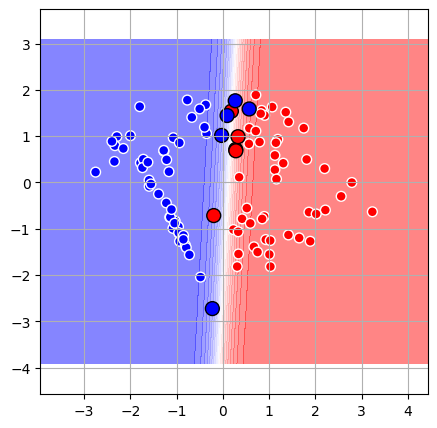

     pcost       dcost       gap    pres   dres
 0: -4.6595e+00 -1.7898e+00  5e+02  2e+01  9e-13
 1: -2.3685e-01 -1.7617e+00  1e+01  4e-01  7e-13
 2: -1.3807e-01 -1.1994e+00  2e+00  5e-02  1e-13
 3: -1.0727e-01 -5.5528e-01  6e-01  1e-02  3e-14
 4: -1.0002e-01 -2.8429e-01  2e-01  5e-03  1e-14
 5: -9.5965e-02 -1.8233e-01  1e-01  1e-03  7e-15
 6: -9.6395e-02 -1.4051e-01  5e-02  5e-04  3e-15
 7: -1.0210e-01 -1.1021e-01  9e-03  6e-05  4e-15
 8: -1.0352e-01 -1.0609e-01  3e-03  3e-06  1e-15
 9: -1.0439e-01 -1.0468e-01  3e-04  2e-07  2e-15
10: -1.0451e-01 -1.0452e-01  5e-06  2e-09  2e-15
11: -1.0452e-01 -1.0452e-01  5e-08  2e-11  2e-15
Optimal solution found.


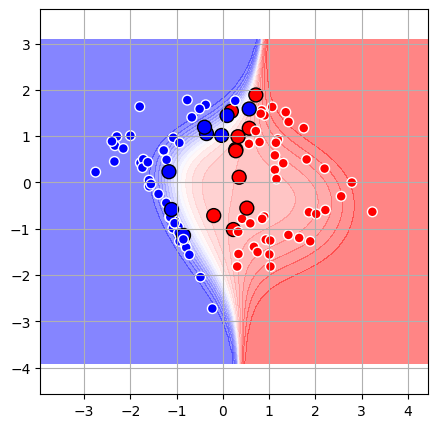

In [51]:
# Just run the following code, do not modify it

from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.0, class_sep=1.0, random_state=5)
y[y==0]=-1

est = MySoftLargeMarginKernelClassfier(C=1e2, kernel_function=linear_kernel_function, param=None).fit(X, y)
plot(X,y, support_vectors=est.support_ids, predict_func=est.predict_proba)

est = MySoftLargeMarginKernelClassfier(C=1e-2, kernel_function=polynomial_kernel_function, param=5).fit(X, y)
plot(X,y, support_vectors=est.support_ids, predict_func=est.predict_proba)

## Question 18  [marks 1]


a) Make a function `estimator = train_svm(X_train, y_train, param)` that takes in input a data matrix `X_train`, an associated target array `y_train`, and a single scalar parameter `param` which corresponds to the regularization parameter of the linear Support Vector machine classifier, and returns a fit classifier object of type `sklearn.svm.LinearSVC`.

b) Make a function `preds = test_svm(X_test, classifier)` that takes in input a data matrix `X_test`, a classifier object `classifier` and returns the prediction array `preds`.

c) Make a function `scores = score_svm(X_test, classifier)` that takes in input a data matrix `X_test`, a classifier object `classifier` and returns the array `scores` containing the distance from the decision surface  for each instance.

In [52]:
from sklearn.svm import LinearSVC

def train_svm(X_train, y_train, param):
    svm = LinearSVC(C=param)
    svm.fit(X_train, y_train)
    return svm

In [53]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [54]:
def test_svm(X_test, estimator):
    preds = estimator.predict(X_test)
    return preds

In [55]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [56]:
def score_svm(X_test, estimator):
    scores = estimator.decision_function(X_test)
    return scores

In [57]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 19  [marks 2]


The one-vs-one strategy constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. 

In the event of a tie (among all those cases that achieve an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.

Make the function `estimators = train_OvO(X_train, y_train, train_func, param)` that takes in input the data matrix `X_train`, the target vector `y_train`, the training procedure `train_func` with an associated parameter `param` and it outputs an object that represent the estimators fit using the OvO strategy.

In [58]:
def train_OvO(X_train, y_train, train_func, param):
    estimators = {}
    for i in range(len(set(y_train))-1):
        for j in range(i+1, len(set(y_train))):
            pair = (i, j)
            X_pair, y_pair = X_train[(y_train == i) | (y_train == j)], y_train[(y_train == i) | (y_train == j)]
            estimator = train_func(**param)
            estimator.fit(X_pair, y_pair)
            estimators[pair] = estimator

    return estimators

In [59]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 20  [marks 7]

Make the function `preds = test_OvO(X_test, test_func, score_func, estimators)` that takes in input the data matrix `X_test`, the classification procedure `test_func`, the score function `score_func`, the estimators object and it returns the predicted class for each instance in the data matrix using the OvO strategy.

Note: only when two or more classifiers end up in a tie the algorithm should resort to the score to break the tie. 

In [60]:
def test_OvO(X_test, test_func, score_func, estimators):
    # Test each pair of classifiers and determine predicted class for each instance
    preds = np.zeros(len(X_test), dtype=int)
    for i in range(len(X_test)):
        scores = {}
        for pair, estimator in estimators.items():
            class1, class2 = pair
            score = estimator.decision_function([X_test[i]])[0]  # get score for the pair of classes
            if score > 0:
                scores[class1] = scores.get(class1, 0) + 1
            else:
                scores[class2] = scores.get(class2, 0) + 1
        # break ties using score
        if len(scores) > 1 and len(set(scores.values())) == 1:
            for pair, estimator in estimators.items():
                score = estimator.predict_proba([X_test[i]])[0]  # get predicted probabilities for each class
                class1, class2 = pair
                if score[0] > score[1]:
                    scores[class1] += 1
                elif score[0] < score[1]:
                    scores[class2] += 1
        # determine predicted class for instance
        if len(scores) == 0:
            preds[i] = -1  # no classifiers voted
        else:
            preds[i] = max(scores, key=scores.get)
    return preds

In [61]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 21  [marks 4]

Make the function `confusion_table(targets, preds)` to output the confusion matrix as a `n x n` Numpy array where `n` is the number of classes. The confusion table is a matrix whose i-th row and j-th column entry indicates the number of samples with true label being the i-th class and predicted label being the j-th class.

As an example, when executing the following code:

```python
test_targets = np.array([0,1,2,0,1,2])
test_preds  =  np.array([0,1,2,0,0,0])
print(confusion_table(test_targets, test_preds))
```
you should obtain:
```
array([[2, 0, 0],
       [1, 1, 0],
       [1, 0, 1]])
```

In [62]:
def confusion_table(targets, preds):
    n_classes = len(np.unique(targets))
    conf_table = np.zeros((n_classes, n_classes), dtype=np.int32)
    for i in range(n_classes):
        for j in range(n_classes):
            conf_table[i,j] = np.sum((targets==i) & (preds==j))
    return conf_table

In [63]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Cross correlations

In the following section you are asked to work on the notion of cross correlations in 2 and 3 dimensions.

Since the computation of a cross correlation becomes undefined at those positions that are very close to the image boundaries, you are asked to **pad** the original signal, i.e. to extend the signal using a specific strategy.

Note that the resulting cross correlation has the same size as the original signal. 

## Question 22  [marks 6]

Make the function `Mp = padding_repeating(M, length)` that takes in input a 2D numpy array `M` and a scalar `length` and pads `M` with `length` replicas of the boundary cells. 

For example running the following code 
```python
n=5
M=np.arange(n*n).reshape(n,n)
print(M)
length=1
print(length)
print(padding_repeating(M, length))
length=2
print(length)
print(padding_repeating(M, length))
```

yields

```
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
1
[[ 0  0  1  2  3  4  4]
 [ 0  0  1  2  3  4  4]
 [ 5  5  6  7  8  9  9]
 [10 10 11 12 13 14 14]
 [15 15 16 17 18 19 19]
 [20 20 21 22 23 24 24]
 [20 20 21 22 23 24 24]]
2
[[ 0  0  0  1  2  3  4  4  4]
 [ 0  0  0  1  2  3  4  4  4]
 [ 0  0  0  1  2  3  4  4  4]
 [ 5  5  5  6  7  8  9  9  9]
 [10 10 10 11 12 13 14 14 14]
 [15 15 15 16 17 18 19 19 19]
 [20 20 20 21 22 23 24 24 24]
 [20 20 20 21 22 23 24 24 24]
 [20 20 20 21 22 23 24 24 24]]
```

In [64]:
def padding_repeating(M, length):
    # Extract the dimensions of the input matrix
    n, m = M.shape
    
    # Create an array of zeros with the new dimensions
    padded_M = np.zeros((n + 2*length, m + 2*length))
    
    # Copy the original matrix into the center of the padded matrix
    padded_M[length:n+length, length:m+length] = M
    
    # Pad the top and bottom of the matrix
    padded_M[0:length, length:m+length] = np.tile(M[0,:], (length, 1))
    padded_M[n+length:n+2*length, length:m+length] = np.tile(M[-1,:], (length, 1))
    
    # Pad the left and right of the matrix
    padded_M[length:n+length, 0:length] = np.tile(M[:,0].reshape(-1,1), (1, length))
    padded_M[length:n+length, m+length:m+2*length] = np.tile(M[:,-1].reshape(-1,1), (1, length))
    
    # Pad the corners of the matrix
    padded_M[0:length, 0:length] = np.tile(M[0,0], (length, length))
    padded_M[n+length:n+2*length, 0:length] = np.tile(M[-1,0], (length, length))
    padded_M[0:length, m+length:m+2*length] = np.tile(M[0,-1], (length, length))
    padded_M[n+length:n+2*length, m+length:m+2*length] = np.tile(M[-1,-1], (length, length))
    
    return padded_M.astype(int)

In [65]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 23  [marks 4]

Make the function `cross_correlation2D(image, kernel, padding_func)` that takes in input a $m \times n$ 2D array `image` and a square $k \times k$ 2D array `kernel` with $k$ an odd number (e.g. kernel is a 3x3 or 5x5, etc, matrix), and a padding function `padding_func`. The function outputs an array of the same size $m \times n$ as `image` which corresponds to the 2D cross correlation between the padded `image` and `kernel`.

In [66]:
def cross_correlation2D(image, kernel, padding_func):
    # Get the dimensions of the input image and the kernel
    m, n = image.shape
    k = kernel.shape[0]
    
    # Pad the input image using the specified padding function
    padded_image = padding_func(image, (k-1)//2)
    
    # Initialize the output array with zeros
    output = np.zeros_like(image)
    
    # Compute the cross-correlation for each pixel in the output array
    for i in range(m):
        for j in range(n):
            # Extract the local region of the padded image
            region = padded_image[i:i+k, j:j+k]
            
            # Compute the dot product between the kernel and the local region
            output[i, j] = np.sum(region * kernel)
    
    return output

In [67]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 24  [marks 3]

Make the function `padding_zeros_3D(M, length)` that takes in input a 3D numpy array `M` and a scalar `length` and pads `M` with with replicas of 0 entries along all sides.

For example:
```python
padding_zeros_3D(np.ones((3,3,3)), length=1)
```
yields
```
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])
```

In [68]:
def padding_zeros_3D(M, length):
    # Extract the dimensions of the input matrix
    n, m, k = M.shape
    
    # Create an array of zeros with the new dimensions
    padded_M = np.zeros((n + 2*length, m + 2*length, k + 2*length))
    
    # Copy the original matrix into the center of the padded matrix
    padded_M[length:n+length, length:m+length, length:k+length] = M
    
    return padded_M

In [69]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 25  [marks 3]

Make the function `cross_correlation3D(image, kernel, padding_func)` that takes in input a $m \times n \times p$ 3D array `image` and a square $k \times k \times k$ 3D array `kernel` with $k$ an odd number (e.g. kernel is a 3x3x3 or 5x5x5, etc, matrix), and a padding function `padding_func`. The function outputs an array of the same size $m \times n \times p$ as `image` which corresponds to the 3D cross correlation between the padded `image` and `kernel`.

In [70]:
def cross_correlation3D(image, kernel, padding_func):
    # Get dimensions of input image and kernel
    m, n, p = image.shape
    k = kernel.shape[0]
    
    # Pad image using the provided padding function
    padded_image = padding_func(image, k//2)
    
    # Initialize output array
    output = np.zeros((m, n, p))
    
    # Compute cross correlation using nested loops
    for i in range(m):
        for j in range(n):
            for l in range(p):
                # Extract a sub-image from the padded image
                sub_image = padded_image[i:i+k, j:j+k, l:l+k]
                
                # Compute element-wise multiplication between sub-image and kernel
                sub_output = sub_image * kernel
                
                # Compute sum of element-wise multiplication
                output[i, j, l] = np.sum(sub_output)
    
    return output

In [71]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 26  [marks 2]

Make the function `make_averaging_kernel(n_dim, length)` that generates a kernel with `n_dim` dimensions (e.g. n_dim = 3) of shape $(l \times l \times \ldots l)$ with $l=$`lenght`. The function should build a specific kernel that, when used in a cross correlation operation, computes the average of all the values in its field of action (e.g. a 3x3x3 kernel makes the average of the 27 neighboring cells).

In [72]:
def make_averaging_kernel(n_dim, length):
    # Compute the total number of elements in the kernel
    n_elements = length ** n_dim

    # Create an array of ones with the appropriate shape
    kernel = np.ones((length,) * n_dim)

    # Normalize the kernel so that the sum of its elements is 1
    kernel /= n_elements

    return kernel

In [73]:
# This cell is reserved for the unit tests. Do not consider this cell. 


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Note that a color image is encoded as a 3D array, where the 3rd dimension is used to encode the color information.

Execute the following code (just execute the next cell):

```python
from PIL import Image
image = np.array(Image.open('fish.jpeg')).astype(int)

# original image
print(image.shape)
plt.imshow(image)
plt.show()

# correlation
kernel = make_averaging_kernel(n_dim=3, length=7)
out = cross_correlation3D(image, kernel, padding_zeros_3D)
out = out.astype(int)
plt.imshow(out)
plt.show()
```

You should obtain something like:
```
(510, 510, 3)
```

<img src='plot4.png' width=300>

(510, 510, 3)


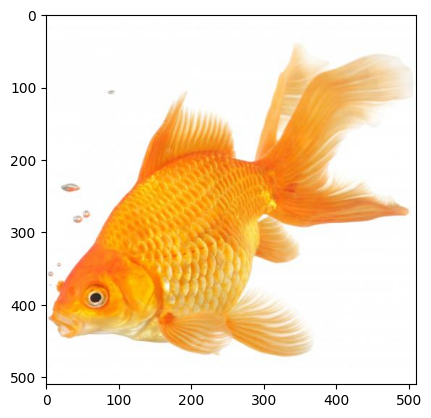

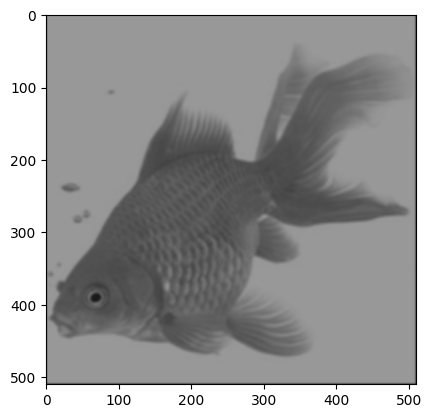

In [74]:
# Just run the following code, do not modify it

from PIL import Image
image = np.array(Image.open('fish.jpeg')).astype(int)

# original image
print(image.shape)
plt.imshow(image)
plt.show()

# correlation
kernel = make_averaging_kernel(n_dim=3, length=5)
out = cross_correlation3D(image, kernel, padding_zeros_3D)
out = out.astype(int)
plt.imshow(out)
plt.show()